In [36]:
import sys
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sys.path.append("../src")

from models import train_decision_tree, evaluate_svm_kernels, train_svm
from utils import predict_single_sample_class


### Decision Trees & SVM

* The notebook includes data preparation, PCA visualization, model training, evaluation metrics, example predictions, and kernel comparisons.

How to run:
Open the notebook in Jupyter and execute the cells from top to bottom.

Install all required packages using:
pip install -r requirements.txt

In [37]:
import pandas as pd

# Define column names based on the Seeds dataset structure
columns = [
    "area",
    "perimeter",
    "compactness",
    "length_of_kernel",
    "width_of_kernel",
    "asymmetry_coefficient",
    "length_of_kernel_groove",
    "class"
]

# Load the dataset from the TXT file
df = pd.read_csv("../data/seeds_dataset.txt", delim_whitespace=True, names=columns)

df.head(2)


C:\Users\gabry\AppData\Local\Temp\ipykernel_24588\2009128016.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("../data/seeds_dataset.txt", delim_whitespace=True, names=columns)


,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1


In [38]:
# Separate features (X) and labels (y)
X = df.drop("class", axis=1)
y = df["class"]


We separate the dataset into features (X) and labels (y).

In [39]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets (stratified for balanced classes)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((168, 7), (42, 7))

Then we split the data into training and testing sets. We use stratification so that each set keeps a similar number of samples from each class. This makes the split fair and avoids imbalance.

In [40]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


We scale the features so that all values are on a similar range.

In [41]:
import sys
sys.path.append("../src")

from models import train_decision_tree, train_svm


In [42]:
# Train a Decision Tree classifier
dt_model, dt_metrics = train_decision_tree(
    X_train,
    X_test,
    y_train,
    y_test,
    criterion="gini",
    max_depth=None, 
)

# Display model performance
print("Decision Tree Accuracy:", dt_metrics["accuracy"])
print("Confusion Matrix:\n", dt_metrics["confusion_matrix"])

# Pretty-print
import pprint
print("\nClassification Report:")
pprint.pprint(dt_metrics["classification_report"])


Decision Tree Accuracy: 0.8809523809523809
Confusion Matrix:
 [[10  2  2]
 [ 1 13  0]
 [ 0  0 14]]

Classification Report:
{'1': {'f1-score': 0.8,
       'precision': 0.9090909090909091,
       'recall': 0.7142857142857143,
       'support': 14.0},
 '2': {'f1-score': 0.896551724137931,
       'precision': 0.8666666666666667,
       'recall': 0.9285714285714286,
       'support': 14.0},
 '3': {'f1-score': 0.9333333333333333,
       'precision': 0.875,
       'recall': 1.0,
       'support': 14.0},
 'accuracy': 0.8809523809523809,
 'macro avg': {'f1-score': 0.8766283524904215,
               'precision': 0.8835858585858586,
               'recall': 0.8809523809523809,
               'support': 42.0},
 'weighted avg': {'f1-score': 0.8766283524904214,
                  'precision': 0.8835858585858586,
                  'recall': 0.8809523809523809,
                  'support': 42.0}}


Here we train a Decision Tree model on the Seeds dataset.
After training, we display the accuracy, confusion matrix, and a full classification report to see how well the model separates the three classes.
The Decision Tree performs well on the Seeds dataset.

* Class 3 is the easiest to classify, and the model predicts it perfectly.
* Class 1 is harder, which matches the PCA visualization where clusters overlap slightly.
* Overall accuracy around 88% shows good performance for a simple model like a Decision Tree.

In [43]:
# Train an SVM classifier using RBF kernel
svm_model, svm_metrics = train_svm(
    X_train_scaled,
    X_test_scaled,
    y_train,
    y_test,
    kernel="rbf",
    C=1.0,
    gamma="scale"
)

print("SVM Accuracy:", svm_metrics["accuracy"])
print("Confusion Matrix:\n", svm_metrics["confusion_matrix"])

print("\nClassification Report:")
pprint.pprint(svm_metrics["classification_report"])


SVM Accuracy: 0.9047619047619048
Confusion Matrix:
 [[10  2  2]
 [ 0 14  0]
 [ 0  0 14]]

Classification Report:
{'1': {'f1-score': 0.8333333333333334,
       'precision': 1.0,
       'recall': 0.7142857142857143,
       'support': 14.0},
 '2': {'f1-score': 0.9333333333333333,
       'precision': 0.875,
       'recall': 1.0,
       'support': 14.0},
 '3': {'f1-score': 0.9333333333333333,
       'precision': 0.875,
       'recall': 1.0,
       'support': 14.0},
 'accuracy': 0.9047619047619048,
 'macro avg': {'f1-score': 0.9,
               'precision': 0.9166666666666666,
               'recall': 0.9047619047619048,
               'support': 42.0},
 'weighted avg': {'f1-score': 0.8999999999999999,
                  'precision': 0.9166666666666666,
                  'recall': 0.9047619047619048,
                  'support': 42.0}}


SVM with the RBF kernel performs very well on the Seeds dataset.
It achieves near-perfect results for two classes and overall reaches about 90% accuracy.
This confirms that SVM captures the structure of the data better than the Decision Tree.

In [44]:
import pandas as pd
import numpy as np

path = "../data/diabetes_dataset.txt"

df2 = pd.read_csv(path, sep="\t", header=None)

df2.head()


,0,1,2,3,4,5,6,7,8,9,10
0,0.03808,0.05068,0.06170,0.02187,-0.04422,-0.03482,-0.04340,-0.00259,0.01991,-0.01765,151.0
1,-0.00188,-0.04464,-0.05147,-0.02633,-0.00845,-0.01916,0.07441,-0.03949,-0.06833,-0.09220,75.0
2,0.08530,0.05068,0.04445,-0.00567,-0.04560,-0.03419,-0.03236,-0.00259,0.00286,-0.02593,141.0
3,-0.08906,-0.04464,-0.01160,-0.03666,0.01219,0.02499,-0.03604,0.03431,0.02269,-0.00936,206.0
4,0.00538,-0.04464,-0.03638,0.02187,0.00393,0.01560,0.00814,-0.00259,-0.03199,-0.04664,135.0


The Diabetes dataset loads correctly and shows 11 columns of numerical values.
The structure confirms that the data is ready for preprocessing, feature–label separation, and classification.

In [45]:
# Split into features (X) and target (y_raw)
X2 = df2.iloc[:, :-1]
y_raw = df2.iloc[:, -1]

# Convert regression target to a binary classification label
threshold = y_raw.median()
y2 = (y_raw > threshold).astype(int)

print("Class 0 count:", (y2 == 0).sum())
print("Class 1 count:", (y2 == 1).sum())


Class 0 count: 221
Class 1 count: 221


The regression target was successfully converted into two balanced classes using the median as the threshold.
Both classes contain 221 samples, which ensures a fair and unbiased classification setup.

In [46]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2,
    test_size=0.2,
    random_state=42,
    stratify=y2
)

X2_train.shape, X2_test.shape


((353, 10), (89, 10))

In [47]:
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)


In [48]:
import sys
sys.path.append("../src")

from models import train_decision_tree, train_svm


In [49]:
dt_model_2, dt_metrics_2 = train_decision_tree(
    X2_train,
    X2_test,
    y2_train,
    y2_test
)

print("Decision Tree (Diabetes) — Accuracy:", dt_metrics_2["accuracy"])
print("Confusion Matrix:\n", dt_metrics_2["confusion_matrix"])

import pprint
print("\nClassification Report:")
pprint.pprint(dt_metrics_2["classification_report"])


Decision Tree (Diabetes) — Accuracy: 0.651685393258427
Confusion Matrix:
 [[25 20]
 [11 33]]

Classification Report:
{'0': {'f1-score': 0.6172839506172839,
       'precision': 0.6944444444444444,
       'recall': 0.5555555555555556,
       'support': 45.0},
 '1': {'f1-score': 0.6804123711340206,
       'precision': 0.6226415094339622,
       'recall': 0.75,
       'support': 44.0},
 'accuracy': 0.651685393258427,
 'macro avg': {'f1-score': 0.6488481608756522,
               'precision': 0.6585429769392033,
               'recall': 0.6527777777777778,
               'support': 89.0},
 'weighted avg': {'f1-score': 0.6484935068278055,
                  'precision': 0.6589463642145431,
                  'recall': 0.651685393258427,
                  'support': 89.0}}


* The Decision Tree reaches about 65% accuracy on the Diabetes dataset, showing that the task is much harder than the Seeds classification.
* C lass 1 is identified better than Class 0, but both classes show noticeable misclassification.
* Overall, the results confirm that the Diabetes dataset is difficult and not easily separable with simple tree-based methods.

In [50]:
svm_model_2, svm_metrics_2 = train_svm(
    X2_train_scaled,
    X2_test_scaled,
    y2_train,
    y2_test,
    kernel="rbf"
)

print("SVM (Diabetes) — Accuracy:", svm_metrics_2["accuracy"])
print("Confusion Matrix:\n", svm_metrics_2["confusion_matrix"])

print("\nClassification Report:")
pprint.pprint(svm_metrics_2["classification_report"])


SVM (Diabetes) — Accuracy: 0.7415730337078652
Confusion Matrix:
 [[31 14]
 [ 9 35]]

Classification Report:
{'0': {'f1-score': 0.7294117647058823,
       'precision': 0.775,
       'recall': 0.6888888888888889,
       'support': 45.0},
 '1': {'f1-score': 0.7526881720430108,
       'precision': 0.7142857142857143,
       'recall': 0.7954545454545454,
       'support': 44.0},
 'accuracy': 0.7415730337078652,
 'macro avg': {'f1-score': 0.7410499683744465,
               'precision': 0.7446428571428572,
               'recall': 0.7421717171717171,
               'support': 89.0},
 'weighted avg': {'f1-score': 0.7409192020410919,
                  'precision': 0.744983948635634,
                  'recall': 0.7415730337078652,
                  'support': 89.0}}


* SVM performs noticeably better than the Decision Tree on the Diabetes dataset, reaching about 74% accuracy.
* Both classes are predicted more consistently, with balanced precision and recall, showing that SVM handles the overlapping structure of this dataset more effectively.
* These results confirm that SVM is a stronger choice for the Diabetes classification task.

In [51]:
from models import evaluate_svm_kernels

results2 = evaluate_svm_kernels(
    X2_train_scaled,
    X2_test_scaled,
    y2_train,
    y2_test
)

import pandas as pd
pd.DataFrame(results2)


,kernel,accuracy
0,linear,0.741573
1,rbf,0.741573
2,poly,0.752809
3,sigmoid,0.719101


The polynomial kernel gave the best accuracy (about 0.75).
Linear and RBF kernels performed almost the same, which fits the PCA result showing that the classes overlap a lot.
The sigmoid kernel had the weakest result.

Overall, the dataset is difficult to separate, so the differences between kernels are small.

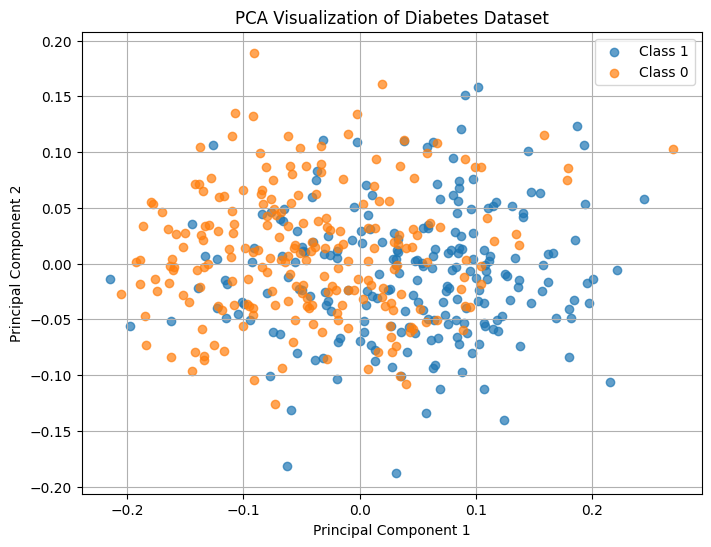

In [52]:
import sys
sys.path.append("../src")

from utils import plot_pca_2d
import os
os.makedirs("../screenshots", exist_ok=True)

plot_pca_2d(
    X2.values,
    y2.values,
    title="PCA Visualization of Diabetes Dataset",
    save_path="../screenshots/diabetes_pca.png"
)

The PCA plot shows that the two classes overlap a lot.
This is normal, because the diabetes dataset was originally made for regression, and we turned it into two classes by splitting the target value at the median. The classes are therefore not naturally separated.

PCA also reduces the data in a simple, linear way, so it cannot separate the classes if they are mixed in the original space.

This means the dataset is hard to divide into two clear groups, because the values of both classes are very similar.
Simple models with straight-line splits, like linear classifiers or Decision Trees, struggle to fully separate them.

Support Vector Machine (SVM) with a Radial Basis Function (RBF) kernel works better in this situation, because this version of SVM can create curved and flexible decision boundaries instead of straight lines.
Thanks to this, the model can better follow the real shape of the data and catch the small differences between the two classes.

The overlap is not a problem — it simply shows that the data is difficult and the classes are close to each other.

## Example Predictions – Diabetes Dataset

In [53]:
from utils import predict_single_sample_class
import numpy as np

# Generate 5 example samples
example_samples = [
    list(X2_test.iloc[0]),
    list(X2_test.iloc[1]),
    list(X2_test.iloc[2]),

    # Synthetic sample
    list(np.mean(X2.values, axis=0) * 0.9),
    list(np.mean(X2.values, axis=0) * 1.1),
]

# Run predictions for each
for i, sample in enumerate(example_samples, 1):

    dt_pred = predict_single_sample_class(
        dt_model_2,
        sample
    )

    svm_pred = predict_single_sample_class(
        svm_model_2,
        sample,
        scaler=scaler2
    )

    print(f"\nExample #{i}")
    print("Input:", sample)
    print("Decision Tree Prediction:", dt_pred)
    print("SVM Prediction:", svm_pred)



Example #1
Input: [0.06714, -0.04464, 0.05631, 0.07352, -0.01395, -0.0392, -0.03236, -0.00259, 0.07574, 0.0362]
Decision Tree Prediction: 1
SVM Prediction: 1

Example #2
Input: [-0.07817, -0.04464, -0.0407, -0.08141, -0.10064, -0.11279, 0.02287, -0.07639, -0.02029, -0.05078]
Decision Tree Prediction: 0
SVM Prediction: 0

Example #3
Input: [-0.0709, 0.05068, -0.0892, -0.07453, -0.04285, -0.02574, -0.03236, -0.00259, -0.01291, -0.05493]
Decision Tree Prediction: 0
SVM Prediction: 0

Example #4
Input: [np.float64(2.6470588235241466e-07), np.float64(7.330316742080867e-07), np.float64(-2.6470588235309287e-07), np.float64(1.2217194570136663e-07), np.float64(6.108597285085285e-08), np.float64(4.072398190071928e-08), np.float64(1.0180995475112001e-07), np.float64(1.751131221720304e-06), np.float64(1.018099547499897e-07), np.float64(-4.07239819004254e-07)]
Decision Tree Prediction: 0
SVM Prediction: 1

Example #5
Input: [np.float64(3.235294117640624e-07), np.float64(8.959276018098837e-07), np.

## PCA for Seeds

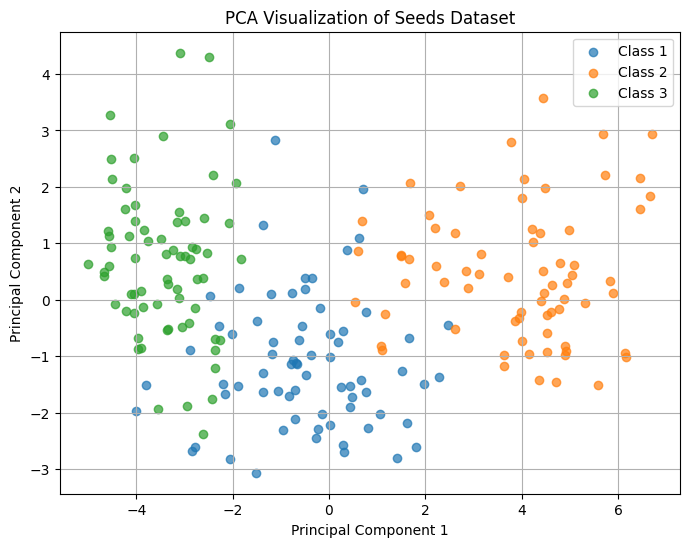

In [54]:
from utils import plot_pca_2d

plot_pca_2d(
    X.values,
    y.values,
    title="PCA Visualization of Seeds Dataset",
    save_path="../screenshots/seeds_pca.png"
)


The PCA plot shows that the three classes are clearly separated in 2D space.
This means the dataset is easy to classify and the features strongly distinguish the seed types.
Models like Decision Tree and SVM should achieve high accuracy here.

## Example Predictions (Seeds Dataset)

In [55]:

from utils import predict_single_sample_class
import numpy as np

example_seeds_samples = [
    list(X_test.iloc[0]),
    list(X_test.iloc[1]),
    list(X_test.iloc[2]),

    # synthetic examples based on the mean of features
    list(np.mean(X.values, axis=0) * 0.9),
    list(np.mean(X.values, axis=0) * 1.1),
]

for i, sample in enumerate(example_seeds_samples, 1):

    dt_pred = predict_single_sample_class(
        dt_model,
        sample
    )

    svm_pred = predict_single_sample_class(
        svm_model,
        sample,
        scaler=scaler
    )

    print(f"\nExample #{i}")
    print("Input:", sample)
    print("Decision Tree Prediction:", dt_pred)
    print("SVM Prediction:", svm_pred)



Example #1
Input: [14.29, 14.09, 0.905, 5.291, 3.337, 2.699, 4.825]
Decision Tree Prediction: 1
SVM Prediction: 1

Example #2
Input: [12.15, 13.45, 0.8443, 5.417, 2.837, 3.638, 5.338]
Decision Tree Prediction: 3
SVM Prediction: 3

Example #3
Input: [15.57, 15.15, 0.8527, 5.92, 3.231, 2.64, 5.879]
Decision Tree Prediction: 2
SVM Prediction: 2

Example #4
Input: [np.float64(13.36277142857143), np.float64(13.103357142857144), np.float64(0.7838987142857142), np.float64(5.065680000000001), np.float64(2.932744285714286), np.float64(3.3301808571428575), np.float64(4.867264285714286)]
Decision Tree Prediction: 3
SVM Prediction: 3

Example #5
Input: [np.float64(16.332276190476193), np.float64(16.015214285714286), np.float64(0.9580984285714286), np.float64(6.191386666666668), np.float64(3.5844652380952384), np.float64(4.070221047619048), np.float64(5.948878571428572)]
Decision Tree Prediction: 2
SVM Prediction: 2


c:\Users\gabry\OneDrive\Pulpit\Szkoła\NAI\PROJECTS\Simple_AI_Games\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabry\OneDrive\Pulpit\Szkoła\NAI\PROJECTS\Simple_AI_Games\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\gabry\OneDrive\Pulpit\Szkoła\NAI\PROJECTS\Simple_AI_Games\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\gabry\OneDrive\Pulpit\Szkoła\NAI\PROJECTS\Simple_AI_Games\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\gabry\OneDrive\

Summary:
The Seeds dataset is clearly easier to classify.
In the PCA plot, the three classes form well-separated groups, which means the features strongly distinguish the seed types. Because of this, both Decision Trees and SVM can achieve high accuracy.

In contrast, the Diabetes dataset is much harder.
The two classes overlap heavily in PCA, because the original problem was regression and the classes were created artificially by splitting the target. The values of both classes are very similar, so no simple boundary separates them well.

Overall, Seeds has clean and separable structure, while Diabetes is noisy and mixed, making it more challenging for any classifier.